### Задание:
Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.

Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
    <ol>
    <li>устранение пропусков в данных;
    <li>кодирование категориальных признаков;
    <li>нормализацию числовых признаков.
    </ol>
    
## Ход выполнения работы


In [1]:
!pip install sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv("melb_data.csv")

In [3]:
null_data = df[df.isnull().any(axis=1)]
null_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.80410,144.99530,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.80080,144.99730,Northern Metropolitan,4019.0
10,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.81100,145.00670,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
# def replace(column):
#     new_col = []
#     for n in column:
#         if type(n) == str:
#             n = n.replace(',', '')
#             n = float(n)
#         new_col.apppend(n)
#     new_col = pd.Series(new_col)
#     return new_col

In [6]:
# array = ["BuildingArea"]
# for i in array:
#     df[i] = replace(df[i])
#     df[i] = df[i].fillna(df[i].mean())

In [7]:
df.shape

(13580, 21)

In [8]:
data_features = list(zip(
[i for i in df.columns],
zip(
    # типы колонок
    [str(i) for i in df.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in df.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Suburb', ('object', 0)),
 ('Address', ('object', 0)),
 ('Rooms', ('int64', 0)),
 ('Type', ('object', 0)),
 ('Price', ('float64', 0)),
 ('Method', ('object', 0)),
 ('SellerG', ('object', 0)),
 ('Date', ('object', 0)),
 ('Distance', ('float64', 0)),
 ('Postcode', ('float64', 0)),
 ('Bedroom2', ('float64', 0)),
 ('Bathroom', ('float64', 0)),
 ('Car', ('float64', 62)),
 ('Landsize', ('float64', 0)),
 ('BuildingArea', ('float64', 6450)),
 ('YearBuilt', ('float64', 5375)),
 ('CouncilArea', ('object', 1369)),
 ('Lattitude', ('float64', 0)),
 ('Longtitude', ('float64', 0)),
 ('Regionname', ('object', 0)),
 ('Propertycount', ('float64', 0))]

In [9]:
columns_with_na = [col for col in df.columns if df[col].isnull().sum() > 0]
data_new = df[columns_with_na].copy()

In [10]:
[(col, df[col].isnull().mean()) for col in columns_with_na]

[('Car', 0.004565537555228277),
 ('BuildingArea', 0.47496318114874814),
 ('YearBuilt', 0.3958026509572901),
 ('CouncilArea', 0.1008100147275405)]

In [11]:
filtered_columns = ['Address', 'Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']
data = df[filtered_columns]
data.head()

,Address,Car,BuildingArea,YearBuilt,CouncilArea
0,85 Turner St,1.0,NaN,NaN,Yarra
1,25 Bloomburg St,0.0,79.0,1900.0,Yarra
2,5 Charles St,0.0,150.0,1900.0,Yarra
3,40 Federation La,1.0,NaN,NaN,Yarra
4,55a Park St,2.0,142.0,2014.0,Yarra


In [12]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [13]:
all_data, filled_data, missed_data = impute_column(df, 'BuildingArea', 'mean')
all_data

array([151.96764989,  79.        , 150.        , ..., 151.96764989,
       157.        , 112.        ])

In [14]:
BuildinArea_new, _, _ = impute_column(df, 'BuildingArea', 'mean')
BuildinArea_new

array([151.96764989,  79.        , 150.        , ..., 151.96764989,
       157.        , 112.        ])

In [15]:
# data_new['BuildingArea'] = BuildinArea_new
# data_new['BuildingArea']

In [16]:
df['BuildingArea'] = BuildinArea_new
df['BuildingArea']

0        151.96765
1         79.00000
2        150.00000
3        151.96765
4        142.00000
           ...    
13575    151.96765
13576    133.00000
13577    151.96765
13578    157.00000
13579    112.00000
Name: BuildingArea, Length: 13580, dtype: float64

In [17]:
YearBuild_new, _, _ = impute_column(df, 'YearBuilt', 'most_frequent')
YearBuild_new

array([1970., 1900., 1900., ..., 1997., 1920., 1920.])

In [18]:
# data_new['YearBuilt'] = YearBuild_new
# data_new['YearBuilt']

In [19]:
df['YearBuilt'] = YearBuild_new
df['YearBuilt']

0        1970.0
1        1900.0
2        1900.0
3        1970.0
4        2014.0
          ...  
13575    1981.0
13576    1995.0
13577    1997.0
13578    1920.0
13579    1920.0
Name: YearBuilt, Length: 13580, dtype: float64

In [20]:
Car_new, _, _ = impute_column(df, 'Car', 'most_frequent')
df['Car'] = Car_new
df['CouncilArea'] = df['CouncilArea'].fillna('NoSuchArea')

In [21]:
data_features = list(zip(
[i for i in df.columns],
zip(
    # типы колонок
    [str(i) for i in df.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in df.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Suburb', ('object', 0)),
 ('Address', ('object', 0)),
 ('Rooms', ('int64', 0)),
 ('Type', ('object', 0)),
 ('Price', ('float64', 0)),
 ('Method', ('object', 0)),
 ('SellerG', ('object', 0)),
 ('Date', ('object', 0)),
 ('Distance', ('float64', 0)),
 ('Postcode', ('float64', 0)),
 ('Bedroom2', ('float64', 0)),
 ('Bathroom', ('float64', 0)),
 ('Car', ('float64', 0)),
 ('Landsize', ('float64', 0)),
 ('BuildingArea', ('float64', 0)),
 ('YearBuilt', ('float64', 0)),
 ('CouncilArea', ('object', 0)),
 ('Lattitude', ('float64', 0)),
 ('Longtitude', ('float64', 0)),
 ('Regionname', ('object', 0)),
 ('Propertycount', ('float64', 0))]

In [28]:
def plot_hist_diff(old_ds, cols):
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
#         new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

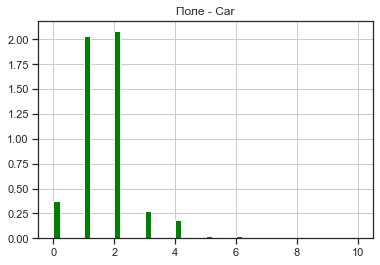

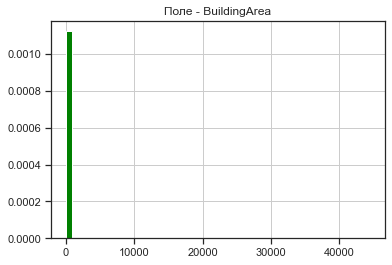

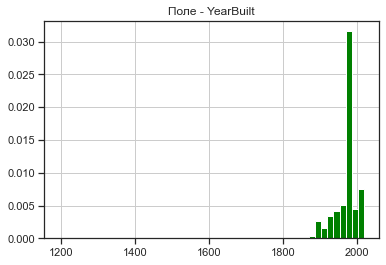

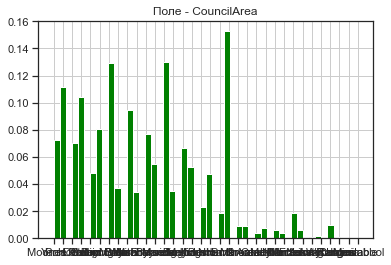

In [29]:
my_data = plot_hist_diff(df, columns_with_na)

## кодирование категориальных признаков (LabelEncoder)

In [42]:
label_encoder = LabelEncoder()

filtered_categor_columns = ['Address','Suburb', 'SellerG', 'Car', 'CouncilArea', 'Regionname', 'Type', 'Method', 'Date']

for col in filtered_categor_columns:
    df[col] = label_encoder.fit_transform(df[col])

data_categor = df[filtered_categor_columns]

df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,12794,2,0,1480000.0,1,23,45,2.5,3067.0,...,1.0,1,202.0,151.96765,1970.0,32,-37.79960,144.99840,2,4019.0
1,0,5943,2,0,1035000.0,1,23,47,2.5,3067.0,...,1.0,0,156.0,79.00000,1900.0,32,-37.80790,144.99340,2,4019.0
2,0,9814,3,0,1465000.0,3,23,48,2.5,3067.0,...,2.0,0,134.0,150.00000,1900.0,32,-37.80930,144.99440,2,4019.0
3,0,9004,3,0,850000.0,0,23,48,2.5,3067.0,...,2.0,1,94.0,151.96765,1970.0,32,-37.79690,144.99690,2,4019.0
4,0,10589,4,0,1600000.0,4,155,49,2.5,3067.0,...,1.0,2,120.0,142.00000,2014.0,32,-37.80720,144.99410,2,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,302,1991,4,0,1245000.0,1,16,33,16.7,3150.0,...,2.0,2,652.0,151.96765,1981.0,25,-37.90562,145.16761,4,7392.0
13576,305,12234,3,0,1031000.0,3,251,33,6.8,3016.0,...,2.0,2,333.0,133.00000,1995.0,25,-37.85927,144.87904,6,6380.0
13577,305,12745,3,0,1170000.0,1,194,33,6.8,3016.0,...,2.0,4,436.0,151.96765,1997.0,25,-37.85274,144.88738,6,6380.0
13578,305,13311,4,0,2500000.0,0,222,33,6.8,3016.0,...,1.0,5,866.0,157.00000,1920.0,25,-37.85908,144.89299,6,6380.0


## нормализация обучающей выборки (MinMaxScaler)

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

min_max_sc = MinMaxScaler()

train, test = train_test_split(df, test_size=0.33)

train = min_max_sc.fit_transform(train)
test = min_max_sc.fit_transform(test)